In [13]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import param_generation as pg
import helpers as hp
from ipywidgets import GridspecLayout,HBox,widgets
from IPython.display import Audio, display

import random
#let's play the sound given the parameters
import imp
imp.reload(pg)
imp.reload(hp)

sr=41000
score_cols=['clap', 'guitar', 'hat', 'kick', 'noise', 'piano', 'rim', 'shake', 'snare', 'synth', 'tom', 'voc']
classes_ranked=[c+"_rank" for c in score_cols]
param_cols=[ 'oscType_0', 'isNoise_0', 
      'A_0', 'D_0', 'S_0', 'R_0', 'numOscPitches_0', 'initPitch_0', 'pitchPathMag_0', 
      'pitchPathAccel_0', 'amplitude_0', 'bpCutLow_0', 'bpCutHigh_0', 'bpOrder_0', 'length_0', 
      'start_0', 'pitch0_0', 'pitch1_0', 'pitch2_0', 'pitch3_0', 'pitch4_0']

pc_no_num=[x[0:-2] for x in param_cols] # param columns with no _# 
df = pd.read_csv("csvs/param_scores.csv",error_bad_lines=False)

In [14]:
df.columns=[*classes_ranked,*score_cols,*param_cols]
df[score_cols].describe().loc[["mean","std","25%","50%","75%"]]

,clap,guitar,hat,kick,noise,piano,rim,shake,snare,synth,tom,voc
mean,0.021974,0.066893,0.103740,0.102348,0.115490,0.058640,0.039107,0.059929,0.050521,0.182850,0.089866,0.108641
std,0.025288,0.036497,0.026005,0.038772,0.024156,0.045829,0.032260,0.045318,0.035573,0.043185,0.039619,0.031582
25%,0.000000,0.041022,0.084999,0.077449,0.100093,0.019862,0.008228,0.016645,0.022966,0.158893,0.062029,0.087285
50%,0.014521,0.066900,0.101465,0.100771,0.114036,0.054758,0.037075,0.061194,0.045702,0.184649,0.091365,0.106792
75%,0.035643,0.092229,0.119737,0.123807,0.129683,0.089109,0.062901,0.095475,0.073655,0.208953,0.119406,0.128314


In [15]:
df.columns=[*classes_ranked,*score_cols,*param_cols]
df[classes_ranked].describe().loc[["mean","std","25%","50%","75%"]]

,clap_rank,guitar_rank,hat_rank,kick_rank,noise_rank,piano_rank,rim_rank,shake_rank,snare_rank,synth_rank,tom_rank,voc_rank
mean,10.576988,7.557092,4.892047,5.113609,3.944071,8.077024,9.443603,7.920449,8.530894,1.550895,5.946653,4.446674
std,1.625859,2.612674,2.020575,2.621103,1.652494,3.083400,2.105764,3.080503,2.537162,1.458206,2.856311,2.145714
25%,10.000000,6.000000,3.000000,3.000000,3.000000,6.000000,8.000000,6.000000,7.000000,1.000000,3.000000,3.000000
50%,11.000000,8.000000,5.000000,5.000000,4.000000,8.000000,10.000000,8.000000,9.000000,1.000000,6.000000,4.000000
75%,12.000000,10.000000,6.000000,7.000000,5.000000,11.000000,11.000000,11.000000,10.000000,1.000000,8.000000,6.000000


<Figure size 1080x540 with 0 Axes>

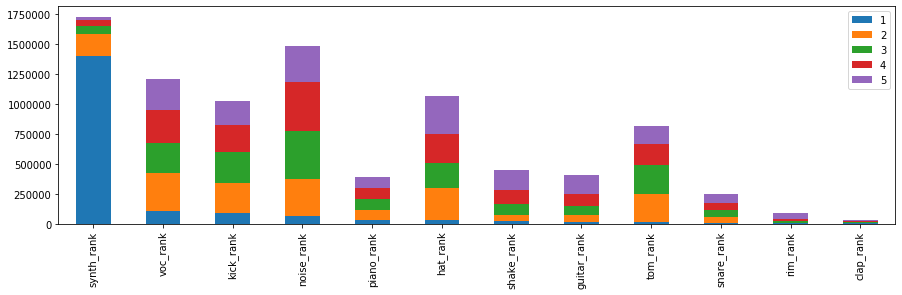

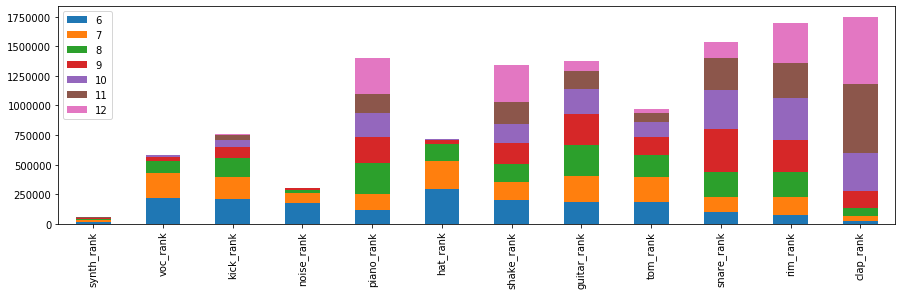

In [16]:
#visualizing ranks per group
gc=pd.DataFrame(columns=range(1,5))
for c in classes_ranked:
    gc=gc.append(df[c].astype(int).value_counts())

gc=gc.sort_values(by=[1,2],ascending=False)
fig = plt.gcf()
fig.set_size_inches(15, 7.5)

gc[list(range(1,6))].plot(kind="bar",figsize=(15,4),stacked=True)

gc[list(range(6,13))].plot(kind="bar",figsize=(15,4),stacked=True)

In [76]:
#convert params ina  row to a sound and play it
def rToParams(r,pset,n=0):

    pset.oscType=r["oscType_%d"%(n,)]
    pset.isNoise=r["isNoise_%d"%(n,)]
    pset.A=r["A_%d"%(n,)]
    pset.D=r["D_%d"%(n,)]
    pset.S=r["S_%d"%(n,)]
    pset.R=r["R_%d"%(n,)]
    #pitches
    pset.numOscPitches=r["numOscPitches_%d"%(n,)]
    pset.initPitch=r["initPitch_%d"%(n,)]
    pset.pitchPathMag=r["pitchPathMag_%d"%(n,)]
    pset.pitchPathAccel=r["pitchPathAccel_%d"%(n,)]
    #######
    pset.amplitude=r["amplitude_%d"%(n,)]
    pset.bpCutLow,pset.bpCutHigh=r["bpCutLow_%d"%(n,)],r["bpCutHigh_%d"%(n,)]
    pset.bpOrder=r["bpOrder_%d"%(n,)]
    pset.length=r["length_%d"%(n,)]
    pset.start=r["start_%d"%(n,)]
    pset.pitches=[]
    return pset

In [79]:
g="kick"

selection=df[(df[g]>0.25) & (df[g+"_rank"]<3) & (df["synth_rank"]>3)].reset_index(drop=True)
print(selection.shape)

grid = GridspecLayout(3, 3)
for i in range(3):
    for j in range(3):
        r=selection.iloc[random.randint(0,selection.shape[0]-1)]
        r=r[param_cols]
        pset=pg.RandomParams()
        pset=rToParams(r,pset)
        out=pg.ensemble([pset])
        
        o= widgets.Output()
        with o:
            display(Audio(hp.memToAud(out),rate=sr))
        grid[i, j] = o
grid

(125, 45)


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

Signature: out.append_display_data(display_object)
Docstring:
Append a display object as an output.

Parameters
----------
display_object : IPython.core.display.DisplayObject
    The object to display (e.g., an instance of
    `IPython.display.Markdown` or `IPython.display.Image`).
File:      ~/miniconda3/envs/syn/lib/python3.6/site-packages/ipywidgets/widgets/widget_output.py
Type:      method
